## NeXLParticle

This example shows how to use NeXLParticle and the 'Zeppelin' struct to load Zeppelin particle data sets and access the tabular, image and spectral data.

In [1]:
using Revise
using NeXLParticle
using Gadfly
using DataFrames
using Images

┌ Info: Precompiling NeXLParticle [9f92fee6-ed62-42c3-b009-0e4f934456c2]
└ @ Base loading.jl:1273
┌ Info: Loading Gadfly support into NeXLParticle.
└ @ NeXLParticle C:\Users\nritchie\.julia\dev\NeXLParticle\src\NeXLParticle.jl:36
┌ Info: Loading NeXLSpectrum Gadfly support
└ @ NeXLSpectrum C:\Users\nritchie\.julia\dev\NeXLSpectrum\src\gadflysupport.jl:329


In [2]:
zep=Zeppelin("Zeppelin\\test.hdz")

Zeppelin[Zeppelin\test.hdz,(250, 98)]

In [21]:
ENV["columns"]=240
zep[1:10, [:NUMBER, :DAVG, :CLASSNAME, :FIRSTELM, :FIRSTPCT, :SECONDELM, :SECONDPCT, :THIRDELM, :THIRDPCT, :FOURTHELM, :FOURTHPCT ]]

10×11 DataFrame
│ Row │ NUMBER │ DAVG    │ CLASSNAME    │ FIRSTELM │ FIRSTPCT │ SECONDELM │ SECONDPCT │ THIRDELM │ THIRDPCT │ FOURTHELM │ FOURTHPCT │
│     │ Int64  │ Float64 │ Categorical… │ Int64    │ Float64  │ Int64     │ Float64   │ Int64    │ Float64  │ Int64     │ Float64   │
├─────┼────────┼─────────┼──────────────┼──────────┼──────────┼───────────┼───────────┼──────────┼──────────┼───────────┼───────────┤
│ 1   │ 1      │ 1.83843 │ Iron-80      │ 26       │ 89.7652  │ 8         │ 39.3747   │ 16       │ 5.07137  │ 14        │ 2.1913    │
│ 2   │ 2      │ 2.98486 │ Iron-60      │ 8        │ 74.331   │ 26        │ 60.0366   │ 16       │ 27.0303  │ 15        │ 8.96148   │
│ 3   │ 3      │ 3.26079 │ Iron-90      │ 26       │ 95.6806  │ 8         │ 35.7823   │ 16       │ 3.39061  │ 17        │ 0.479296  │
│ 4   │ 4      │ 3.50613 │ Calcite      │ 20       │ 89.9618  │ 8         │ 33.4914   │ 14       │ 5.39432  │ 19        │ 1.38043   │
│ 5   │ 5      │ 2.39501 │ Iron-90      │ 26       │ 96.5634  │ 8         │ 36.367    │ 16       │ 1.70483  │ 14        │ 1.40178   │
│ 6   │ 6      │ 3.59721 │ Iron-90      │ 26       │ 94.2262  │ 8         │ 36.4597   │ 14       │ 3.21033  │ 16        │ 1.34868   │
│ 7   │ 7      │ 2.73491 │ Iron-60      │ 26       │ 65.0184  │ 8         │ 35.9561   │ 56       │ 12.6194  │ 16        │ 7.09004   │
│ 8   │ 8      │ 1.20893 │ Iron-80      │ 26       │ 83.6919  │ 8         │ 37.1902   │ 16       │ 6.01653  │ 30        │ 3.89939   │
│ 9   │ 9      │ 2.75471 │ Ba+S         │ 8        │ 71.3241  │ 56        │ 41.7317   │ 16       │ 30.5127  │ 26        │ 22.0047   │
│ 10  │ 10     │ 2.94308 │ Silicate     │ 14       │ 56.823   │ 8         │ 50.7714   │ 13       │ 22.3259  │ 11        │ 9.12294   │

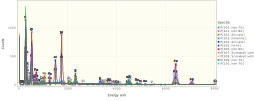

In [4]:
set_default_plot_size(10inch,4inch)
s=zep[103]
imgs = s[:Image]
plot(zep, 100:110, xmax=0.8e4)

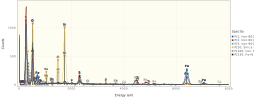

In [5]:
plot(zep, [1,2,3,10,100,130], xmax=0.8e4, palette=NeXLCore.NeXLColorblind)

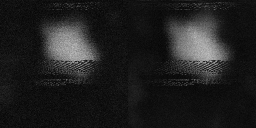

In [6]:
[imgs[:,:,1] imgs[:,:,2]]

In [7]:
s[:StagePosition]

Dict{Symbol,Float64} with 5 entries:
  :Z => 2.50081
  :T => -0.0
  :R => -0.0
  :X => -1.38824
  :Y => 0.81837

In [8]:
elms = ( n"Ag", n"Al", n"Ba", n"Bi", n"Br", n"C", n"Ca", n"Ce", n"Cl", n"Co", n"Cr", n"Cu", n"F", n"Fe", n"K", n"Mg", n"Mn", n"Na", n"Nd", n"Ni", 
    n"O", n"P", n"Pb", n"S", n"Sb", n"Si", n"Sn", n"Sr", n"Ti", n"V", n"W", n"Zn", n"Zr" )
refs = Dict{Element,Spectrum}( elm => readEMSA("Zeppelin\\Standards\\$(elm.symbol) std.msa") for elm in elms);

In [9]:
det = matching(refs[n"Fe"],132.0)

EDS[4096 channels, E[ch] = 1.63032 + 9.99856⋅ch, 132.0 eV @ Mn Kα]

In [10]:
NeXLParticle.quantify(zep, det, refs, withUncertainty=false)
@time res=NeXLParticle.quantify(zep, det, refs, withUncertainty=false);

  9.808624 seconds (67.33 M allocations: 6.458 GiB, 12.88% gc time)


In [16]:
ENV["columns"]=500
res[102:122,1:40]

21×40 DataFrame
│ Row │ NUMBER │ FIELD │ MAGFIELD │ XABS     │ YABS    │ XDAC  │ YDAC  │ XFERET  │ YFERET  │ DAVG    │ DMAX    │ DMIN     │ DPERP   │ ASPECT  │ AREA    │ PERIMETER │ ORIENTATION │ MAG        │ VIDEO │ CLASS        │ CLASSNAME          │ LIVETIME │ IMPORTANCE │ VERIFIEDCLASS │ U_O_    │ U_F_        │ U_NA_      │ U_MG_     │ U_AL_     │ U_SI_    │ U_P_      │ U_S_      │ U_CL_    │ U_K_      │ U_CA_     │ U_TI_     │ U_V_     │ U_CR_    │ U_MN_    │ U_FE_     │
│     │ Int64  │ Int64 │ Int64    │ Float64  │ Float64 │ Int64 │ Int64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64  │ Float64 │ Float64 │ Float64 │ Float64   │ Float64     │ Float64    │ Int64 │ Categorical… │ Categorical…       │ Float64  │ Int64      │ Int64         │ Float64 │ Float64     │ Float64    │ Float64   │ Float64   │ Float64  │ Float64   │ Float64   │ Float64  │ Float64   │ Float64   │ Float64   │ Float64  │ Float64  │ Float64  │ Float64   │
├─────┼────────┼───────┼──────────┼──────────┼─────────┼───────┼───────┼─────────┼─────────┼─────────┼─────────┼──────────┼─────────┼─────────┼─────────┼───────────┼─────────────┼────────────┼───────┼──────────────┼────────────────────┼──────────┼────────────┼───────────────┼─────────┼─────────────┼────────────┼───────────┼───────────┼──────────┼───────────┼───────────┼──────────┼───────────┼───────────┼───────────┼──────────┼──────────┼──────────┼───────────┤
│ 1   │ 102    │ 2     │ 1        │ -13.9743 │ 8.18322 │ 29523 │ 21961 │ 2.98613 │ 5.52955 │ 3.29225 │ 5.31254 │ 2.53148  │ 2.98613 │ 2.09859 │ 8.77709 │ 14.0545   │ 90.0        │ 0.00639924 │ 89    │ 12           │ Silicate           │ 0.4      │ 1          │ -1            │ 2.64249 │ 0.770413    │ 0.579749   │ 0.420448  │ 1.71381   │ 5.48678  │ 0.0       │ 0.0115588 │ 0.129859 │ 0.205084  │ 0.0877159 │ 0.0       │ 0.248967 │ 0.0      │ 0.0      │ 1.19441   │
│ 2   │ 103    │ 2     │ 1        │ -13.8824 │ 8.18373 │ 18935 │ 22020 │ 1.4757  │ 1.64064 │ 1.4378  │ 1.67808 │ 1.17522  │ 1.46371 │ 1.42788 │ 1.62382 │ 5.31881   │ 146.25      │ 0.00639924 │ 119   │ 3            │ Ilmenite           │ 0.4      │ 1          │ -1            │ 5.38017 │ 1.52221     │ 0.575941   │ 0.0       │ 0.717797  │ 0.767319 │ 0.283768  │ 0.864354  │ 0.0      │ 0.130562  │ 0.046165  │ 2.01784   │ 0.452875 │ 0.348152 │ 0.435985 │ 13.3172   │
│ 3   │ 104    │ 2     │ 1        │ -14.0239 │ 8.1908  │ 35238 │ 22834 │ 5.65108 │ 6.82296 │ 4.8114  │ 7.11411 │ 4.10009  │ 5.29425 │ 1.73511 │ 19.2263 │ 21.1566   │ 67.5        │ 0.00639924 │ 89    │ 12           │ Silicate           │ 0.4      │ 1          │ -1            │ 4.61656 │ 0.839788    │ 0.272882   │ 0.32598   │ 5.63397   │ 8.25074  │ 0.252199  │ 0.116962  │ 0.0      │ 1.38371   │ 0.12095   │ 0.0783384 │ 0.412811 │ 0.405803 │ 0.0      │ 1.20558   │
│ 4   │ 105    │ 2     │ 1        │ -13.9216 │ 8.19269 │ 23449 │ 23052 │ 1.82293 │ 2.43057 │ 1.54586 │ 1.97648 │ 0.760979 │ 1.85865 │ 2.59728 │ 1.80538 │ 12.8161   │ 45.0        │ 0.00639924 │ 125   │ 21           │ Fe+S               │ 0.4      │ 1          │ -1            │ 7.29167 │ 1.92999     │ 0.812578   │ 0.165473  │ 0.120116  │ 0.599071 │ 0.420181  │ 3.36071   │ 0.0      │ 0.358655  │ 0.165431  │ 0.331779  │ 0.495872 │ 0.419235 │ 0.49211  │ 12.4739   │
│ 5   │ 106    │ 2     │ 1        │ -13.9545 │ 8.19937 │ 27244 │ 23821 │ 1.4757  │ 2.09203 │ 1.40156 │ 2.08602 │ 0.486114 │ 1.38958 │ 4.29122 │ 1.53291 │ 10.6489   │ 112.5       │ 0.00639924 │ 129   │ 8            │ Iron-90            │ 0.4      │ 1          │ -1            │ 2.33033 │ 1.05808     │ 0.0        │ 0.103153  │ 0.489692  │ 0.312482 │ 0.187518  │ 0.0564163 │ 0.0      │ 0.0       │ 0.0       │ 0.0       │ 0.175355 │ 0.262387 │ 0.377717 │ 10.3191   │
│ 6   │ 107    │ 2     │ 1        │ -13.8907 │ 8.20415 │ 19887 │ 24372 │ 2.44793 │ 2.83856 │ 2.24285 │ 2.66962 │ 1.94579  │ 2.222   │ 1.372   │ 4.07125 │ 8.97223   │ 67.5        │ 0.00639924 │ 109   │ 33           │ Screwball-vehicleP │ 0.4      │ 1          │ -1 

In [17]:
describe(res[:,9:2:end])

45×8 DataFrame
│ Row │ variable    │ mean     │ min            │ median   │ max      │ nunique │ nmissing │ eltype                   │
│     │ Symbol      │ Union…   │ Any            │ Union…   │ Any      │ Union…  │ Union…   │ Type                     │
├─────┼─────────────┼──────────┼────────────────┼──────────┼──────────┼─────────┼──────────┼──────────────────────────┤
│ 1   │ YFERET      │ 3.93937  │ 1.22397        │ 3.4028   │ 15.0522  │         │          │ Float64                  │
│ 2   │ DMAX        │ 4.46479  │ 1.33862        │ 3.7935   │ 17.7312  │         │          │ Float64                  │
│ 3   │ DPERP       │ 2.96755  │ 0.329863       │ 2.69834  │ 9.13201  │         │          │ Float64                  │
│ 4   │ AREA        │ 10.0426  │ 0.505657       │ 5.98107  │ 87.9027  │         │          │ Float64                  │
│ 5   │ ORIENTATION │ 87.525   │ 0.0            │ 90.0     │ 168.75   │         │          │ Float64                  │
│ 6   │ VIDEO       │ 103.092  │ 22             │ 97.0     │ 194      │         │          │ Int64                    │
│ 7   │ CLASSNAME   │          │ #Unclassified# │          │ Titanite │ 27      │          │ CategoricalString{UInt8} │
│ 8   │ IMPORTANCE  │ 1.0      │ 1              │ 1.0      │ 1        │         │          │ Int64                    │
│ 9   │ U_O_        │ 5.55842  │ 0.994208       │ 4.40625  │ 28.2328  │         │          │ Float64                  │
│ 10  │ U_NA_       │ 0.335623 │ 0.0            │ 0.207967 │ 6.92054  │         │          │ Float64                  │
⋮
│ 35  │ TI          │ 1.66905  │ 0.0            │ 0.0      │ 76.2726  │         │ 0        │ Union{Missing, Float64}  │
│ 36  │ CR          │ 0.328156 │ 0.0            │ 0.0      │ 44.3018  │         │ 0        │ Union{Missing, Float64}  │
│ 37  │ FE          │ 41.737   │ 0.0            │ 36.7979  │ 93.755   │         │ 0        │ Union{Missing, Float64}  │
│ 38  │ NI          │ 0.269819 │ 0.0            │ 0.0      │ 6.10878  │         │ 0        │ Union{Missing, Float64}  │
│ 39  │ ZN          │ 0.893903 │ 0.0            │ 0.29697  │ 11.1309  │         │ 0        │ Union{Missing, Float64}  │
│ 40  │ SR          │ 1.61002  │ 0.0            │ 0.0      │ 18.1746  │         │ 0        │ Union{Missing, Float64}  │
│ 41  │ AG          │ 0.30897  │ 0.0            │ 0.0      │ 5.61982  │         │ 0        │ Union{Missing, Float64}  │
│ 42  │ SB          │ 1.70582  │ 0.0            │ 0.656752 │ 26.5955  │         │ 0        │ Union{Missing, Float64}  │
│ 43  │ CE          │ 0.259483 │ 0.0            │ 0.0      │ 3.19405  │         │ 0        │ Union{Missing, Float64}  │
│ 44  │ W           │ 0.533365 │ 0.0            │ 0.0      │ 13.7976  │         │ 0        │ Union{Missing, Float64}  │
│ 45  │ BI          │ 1.18626  │ 0.0            │ 0.0      │ 35.9376  │         │ 0        │ Union{Missing, Float64}  │

Things to add
  - Plot multiple rows from a zep
  - Add image scales
  - Add multi-images to left of plot
  - Row filters
  - Columns sorting

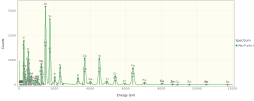

In [18]:
plot(NeXLParticle.maxparticle(zep, eachparticle(zep)), xmin = 0.0, xmax=12000.0, klms=[ n"C", n"O", n"Mg", n"Al", n"Si", n"Ca", n"Ti", n"Cr", n"Fe", n"Na", n"S", n"P", n"K", n"Zn", n"Cu", n"As"  ])

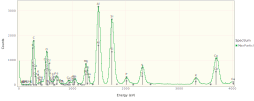

In [19]:
plot(NeXLParticle.maxparticle(zep, eachparticle(zep)), xmin = 0.0, xmax=4000.0, klms=[ n"C", n"O", n"Mg", n"Al", n"Si", n"Ca", n"Ti", n"Cr", n"Fe", n"Na", n"S", n"P", n"K", n"Zn", n"Cu", n"As"  ])

In [20]:
@time NeXLParticle.maxparticle(zep, eachparticle(zep));

  0.718798 seconds (7.42 M allocations: 147.741 MiB, 5.66% gc time)
